PEMODELAN AI

In [ ]:
!pip install Sastrawi
!pip install sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
data = pd.read_csv('data hasil preprocessing(3).csv')
data

,Ulasan,Rate,Label,case_folding,token,Normalisasi,Stopwords,Stemmer
0,"seller response oke, pengiriman oke dan barang...",5.0,positif,seller response oke pengiriman oke dan barang...,"['seller', 'response', 'oke', 'pengiriman', 'o...","['seller', 'response', 'oke', 'pengiriman', 'o...","['seller', 'response', 'pengiriman', 'barang',...","['seller', 'response', 'kirim', 'barang', 'bag..."
1,mantul barangnya sesuai deskripsi,5.0,positif,mantul barangnya sesuai deskripsi,"['mantul', 'barangnya', 'sesuai', 'deskripsi']","['mantap betul', 'barangnya', 'sesuai', 'deskr...","['mantap betul', 'barangnya', 'sesuai', 'deskr...","['mantap betul', 'barang', 'sesuai', 'deskripsi']"
2,jgn diragukan lagi belanja di toko ini. pokokn...,5.0,positif,jgn diragukan lagi belanja di toko ini pokokn...,"['jgn', 'diragukan', 'lagi', 'belanja', 'di', ...","['jangan', 'diragukan', 'lagi', 'belanja', 'di...","['diragukan', 'belanja', 'toko', 'pokoknya', '...","['ragu', 'belanja', 'toko', 'pokok', 'top', 'm..."
3,ori segel repack berfingsi packing aman respon...,5.0,positif,ori segel repack berfingsi packing aman respon...,"['ori', 'segel', 'repack', 'berfingsi', 'packi...","['ori', 'segel', 'repack', 'berfungsi', 'packi...","['ori', 'segel', 'repack', 'berfungsi', 'packi...","['ori', 'segel', 'repack', 'fungsi', 'packing'..."
4,Alhamdulilah sesuai,5.0,positif,alhamdulilah sesuai,"['alhamdulilah', 'sesuai']","['alhamdulilah', 'sesuai']","['alhamdulilah', 'sesuai']","['alhamdulilah', 'sesuai']"
...,...,...,...,...,...,...,...,...
1111,"Tombol fisik sering macet, tidak nyaman digunakan",1.0,negatif,tombol fisik sering macet tidak nyaman digunakan,"['tombol', 'fisik', 'sering', 'macet', 'tidak'...","['tombol', 'fisik', 'sering', 'macet', 'tidak'...","['tombol', 'fisik', 'macet', 'nyaman']","['tombol', 'fisik', 'macet', 'nyaman']"
1112,"Kualitas audio buruk, suara sangat kecil dan p...",1.0,negatif,kualitas audio buruk suara sangat kecil dan p...,"['kualitas', 'audio', 'buruk', 'suara', 'sanga...","['kualitas', 'audio', 'buruk', 'suara', 'sanga...","['kualitas', 'audio', 'buruk', 'suara', 'pecah']","['kualitas', 'audio', 'buruk', 'suara', 'pecah']"
1113,"Ponsel mudah sekali hang, sangat tidak stabil",1.0,negatif,ponsel mudah sekali hang sangat tidak stabil,"['ponsel', 'mudah', 'sekali', 'hang', 'sangat'...","['ponsel', 'mudah', 'sekali', 'hang', 'sangat'...","['ponsel', 'mudah', 'hang', 'stabil']","['ponsel', 'mudah', 'hang', 'stabil']"
1114,Ponsel sering bergetar dan membuat suara aneh ...,1.0,negatif,ponsel sering bergetar dan membuat suara aneh ...,"['ponsel', 'sering', 'bergetar', 'dan', 'membu...","['ponsel', 'sering', 'bergetar', 'dan', 'membu...","['ponsel', 'bergetar', 'suara', 'aneh', 'alasan']","['ponsel', 'getar', 'suara', 'aneh', 'alas']"


In [ ]:
# Fungsi untuk mengkategorikan rate sebagai label sentimen
def categorize_sentiment(rate):
    if rate in [1, 2]:
        return 'Negatif'
    elif rate == 3:
        return 'Netral'
    else:
        return 'Positif'

In [ ]:
# Terapkan fungsi untuk membuat kolom sentimen
data['Sentiment'] = data['Rate'].apply(categorize_sentiment)
data

,Ulasan,Rate,Label,case_folding,token,Normalisasi,Stopwords,Stemmer,Sentiment
0,"seller response oke, pengiriman oke dan barang...",5.0,positif,seller response oke pengiriman oke dan barang...,"['seller', 'response', 'oke', 'pengiriman', 'o...","['seller', 'response', 'oke', 'pengiriman', 'o...","['seller', 'response', 'pengiriman', 'barang',...","['seller', 'response', 'kirim', 'barang', 'bag...",Positif
1,mantul barangnya sesuai deskripsi,5.0,positif,mantul barangnya sesuai deskripsi,"['mantul', 'barangnya', 'sesuai', 'deskripsi']","['mantap betul', 'barangnya', 'sesuai', 'deskr...","['mantap betul', 'barangnya', 'sesuai', 'deskr...","['mantap betul', 'barang', 'sesuai', 'deskripsi']",Positif
2,jgn diragukan lagi belanja di toko ini. pokokn...,5.0,positif,jgn diragukan lagi belanja di toko ini pokokn...,"['jgn', 'diragukan', 'lagi', 'belanja', 'di', ...","['jangan', 'diragukan', 'lagi', 'belanja', 'di...","['diragukan', 'belanja', 'toko', 'pokoknya', '...","['ragu', 'belanja', 'toko', 'pokok', 'top', 'm...",Positif
3,ori segel repack berfingsi packing aman respon...,5.0,positif,ori segel repack berfingsi packing aman respon...,"['ori', 'segel', 'repack', 'berfingsi', 'packi...","['ori', 'segel', 'repack', 'berfungsi', 'packi...","['ori', 'segel', 'repack', 'berfungsi', 'packi...","['ori', 'segel', 'repack', 'fungsi', 'packing'...",Positif
4,Alhamdulilah sesuai,5.0,positif,alhamdulilah sesuai,"['alhamdulilah', 'sesuai']","['alhamdulilah', 'sesuai']","['alhamdulilah', 'sesuai']","['alhamdulilah', 'sesuai']",Positif
...,...,...,...,...,...,...,...,...,...
1111,"Tombol fisik sering macet, tidak nyaman digunakan",1.0,negatif,tombol fisik sering macet tidak nyaman digunakan,"['tombol', 'fisik', 'sering', 'macet', 'tidak'...","['tombol', 'fisik', 'sering', 'macet', 'tidak'...","['tombol', 'fisik', 'macet', 'nyaman']","['tombol', 'fisik', 'macet', 'nyaman']",Negatif
1112,"Kualitas audio buruk, suara sangat kecil dan p...",1.0,negatif,kualitas audio buruk suara sangat kecil dan p...,"['kualitas', 'audio', 'buruk', 'suara', 'sanga...","['kualitas', 'audio', 'buruk', 'suara', 'sanga...","['kualitas', 'audio', 'buruk', 'suara', 'pecah']","['kualitas', 'audio', 'buruk', 'suara', 'pecah']",Negatif
1113,"Ponsel mudah sekali hang, sangat tidak stabil",1.0,negatif,ponsel mudah sekali hang sangat tidak stabil,"['ponsel', 'mudah', 'sekali', 'hang', 'sangat'...","['ponsel', 'mudah', 'sekali', 'hang', 'sangat'...","['ponsel', 'mudah', 'hang', 'stabil']","['ponsel', 'mudah', 'hang', 'stabil']",Negatif
1114,Ponsel sering bergetar dan membuat suara aneh ...,1.0,negatif,ponsel sering bergetar dan membuat suara aneh ...,"['ponsel', 'sering', 'bergetar', 'dan', 'membu...","['ponsel', 'sering', 'bergetar', 'dan', 'membu...","['ponsel', 'bergetar', 'suara', 'aneh', 'alasan']","['ponsel', 'getar', 'suara', 'aneh', 'alas']",Negatif


In [ ]:
# Preprocessing text data: lowercasing
data['Ulasan'] = data['Ulasan'].str.lower()

In [ ]:
# Hapus baris dengan nilai 'Ulasan' yang hilang
data = data.dropna(subset=['Ulasan'])

<ipython-input-57-07a0da459a91>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


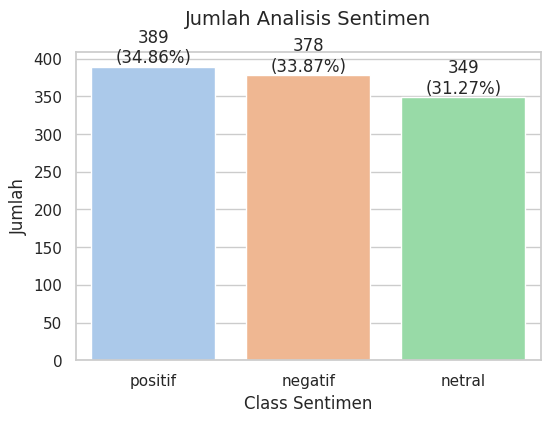

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = data['Label'].value_counts()
sns.set(style='whitegrid')

fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentimen', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

total = len(data['Label'])

for i, count in enumerate(sentiment_count.values):
  percentage = f'{100*count/total:.2f}%'
  ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data['Ulasan'], data['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
# Get Indonesian stop words from Sastrawi
stop_factory = StopWordRemoverFactory()
indonesian_stop_words = stop_factory.get_stop_words()

In [ ]:
# Vektorisasi data teks menggunakan TF-IDF
vectorizer = TfidfVectorizer(stop_words=indonesian_stop_words, max_features=None)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Parameter grid untuk mencari k terbaik
param_grid = {'n_neighbors': range(1, 51)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X_train_tfidf, y_train)

print("K terbaik:", grid.best_params_)
print("Akurasi terbaik:", grid.best_score_)


K terbaik: {'n_neighbors': 12}
Akurasi terbaik: 0.7421098626716603


In [ ]:
# Latih classifier KNN
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train_tfidf, y_train)



KNeighborsClassifier(n_neighbors=12)

In [ ]:
# # Prediksi probabilitas untuk data latih
# y_train_proba = knn.predict_proba(X_train_tfidf)

# # Buat DataFrame untuk data latih
# probabilitas_data_latih = pd.DataFrame(y_train_proba, columns=['Probabilitas_Negatif', 'Probabilitas_Positif', 'Probabilitas_Netral'])
# probabilitas_data_latih['Prediksi'] = knn.predict(X_train_tfidf)
# probabilitas_data_latih['Ulasan'] = X_train.reset_index(drop=True)

# # Tampilkan DataFrame hasil
# print(probabilitas_data_latih)


In [ ]:
# Prediksi probabilitas sentimen
y_pred_proba = knn.predict_proba(X_test_tfidf)

# Buat DataFrame untuk probabilitas
probabilitas_data_test = pd.DataFrame(y_pred_proba, columns=['Probabilitas_Negatif', 'Probabilitas_Positif', 'Probabilitas_Netral'])
probabilitas_data_test['Prediksi'] = y_pred
probabilitas_data_test['Ulasan'] = X_test.reset_index(drop=True)  # Tambahkan ulasan asli

# Tampilkan semua probabilitas
print(probabilitas_data_test)


     Probabilitas_Negatif  Probabilitas_Positif  Probabilitas_Netral Prediksi  \
0                0.250000              0.250000             0.500000  Positif   
1                0.000000              0.000000             1.000000  Positif   
2                0.500000              0.000000             0.500000  Negatif   
3                0.333333              0.583333             0.083333   Netral   
4                0.666667              0.250000             0.083333  Negatif   
..                    ...                   ...                  ...      ...   
219              0.583333              0.166667             0.250000  Negatif   
220              0.583333              0.083333             0.333333  Negatif   
221              0.500000              0.250000             0.250000  Negatif   
222              0.000000              0.000000             1.000000  Positif   
223              0.500000              0.083333             0.416667  Negatif   

                           

In [ ]:
# Prediksi sentimen set pengujian
y_pred = knn.predict(X_test_tfidf)

In [ ]:
# Evaluasi model
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
# Tampilkan laporan klasifikasi
print(classification_rep)

              precision    recall  f1-score   support

     Negatif       0.81      0.80      0.81        70
      Netral       0.86      0.76      0.81        66
     Positif       0.82      0.91      0.86        88

    accuracy                           0.83       224
   macro avg       0.83      0.82      0.83       224
weighted avg       0.83      0.83      0.83       224



Hasil akurasi Model KNN

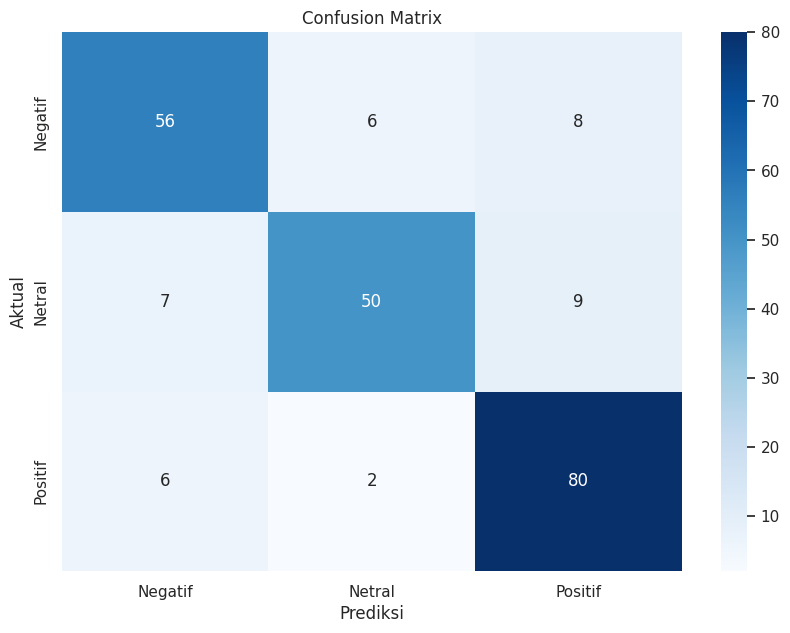

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Cari indeks ulasan yang salah prediksi
errors = X_test[y_test != y_pred]

# Konversi ke DataFrame untuk tampilan lebih rapi
errors_df = pd.DataFrame({
    'Ulasan': errors,
    'Label Aktual': y_test[y_test != y_pred],
    'Label Prediksi': y_pred[y_test != y_pred]
})

# Tampilkan semua data
print("Semua ulasan yang salah prediksi:")
print(errors_df)


Semua ulasan yang salah prediksi:
                                                 Ulasan Label Aktual  \
993                                berfungsi cukup baik       Netral   
862                 tombolnya agak keras, kurang nyaman      Negatif   
792   kalau ada permintaan barang di cancel, ya tolo...      Negatif   
485   toko ini sangat tidak amanah sama sekali menge...      Negatif   
622   saya kasih bintang 3 karna pengirimannya cukup...       Netral   
673   ponsel terlalu licin, mudah jatuh dari genggaman.      Negatif   
1105  brg dlm kondisi baru n segel, tp stlh di coba ...      Negatif   
983                tidak ada yang benar-benar istimewa.      Negatif   
477   lecet dibagian colokan sama banyak goresan di ...       Netral   
999         barang datang, tapi tidak ada hal istimewa.      Negatif   
982                         hasil foto bisa lebih jelas      Positif   
433   barang cukup ok, cs buruk bales chat gak nyamb...       Netral   
760   barang bagus sesuai yg d

# visualisasi kata yang sering muncul tiap sentimen

<Axes: title={'center': 'Top 10 Words in Positif Reviews'}>

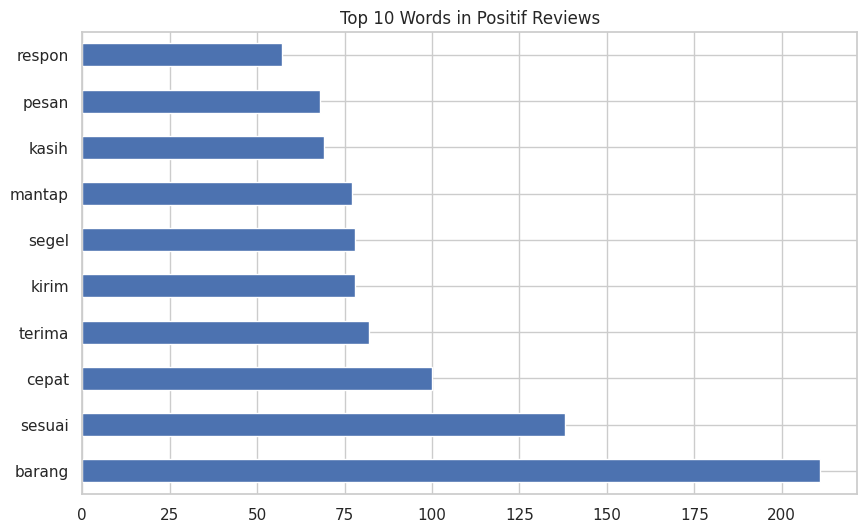

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Menghitung frekuensi kata dengan CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)

positive_reviews = data[data['Sentiment'] == 'Positif']['Stemmer']
X_pos = vectorizer.fit_transform(positive_reviews)

# Top words Positif
top_words_pos = pd.DataFrame(X_pos.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
top_words_pos.head(10).plot(kind='barh', figsize=(10, 6), title="Top 10 Words in Positif Reviews")


<Axes: title={'center': 'Top 20 Words in Netral Reviews'}>

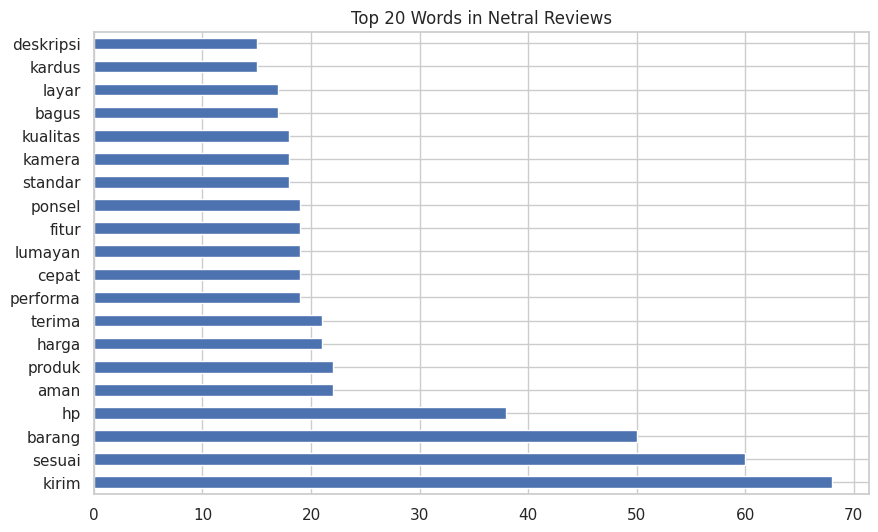

In [ ]:
netral_reviews = data[data['Sentiment'] == 'Netral']['Stemmer']
X_net = vectorizer.fit_transform(netral_reviews)
# Top words Netral
top_words_net = pd.DataFrame(X_net.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
top_words_net.head(20).plot(kind='barh', figsize=(10, 6), title="Top 20 Words in Netral Reviews")



<Axes: title={'center': 'Top 10 Words in Negatif Reviews'}>

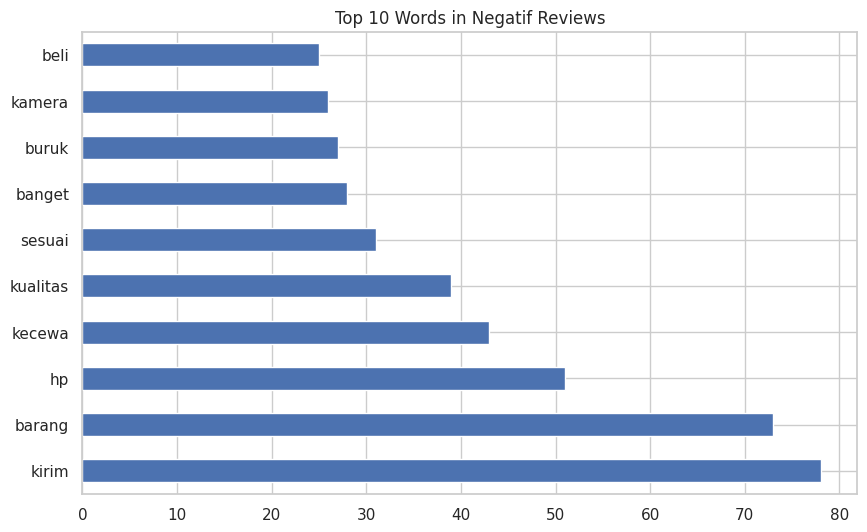

In [ ]:
negative_reviews = data[data['Sentiment'] == 'Negatif']['Stemmer']
X_neg = vectorizer.fit_transform(negative_reviews)
# Top words Negatif
top_words_neg = pd.DataFrame(X_neg.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
top_words_neg.head(10).plot(kind='barh', figsize=(10, 6), title="Top 10 Words in Negatif Reviews")


# word cloud

In [ ]:
pip install wordcloud matplotlib


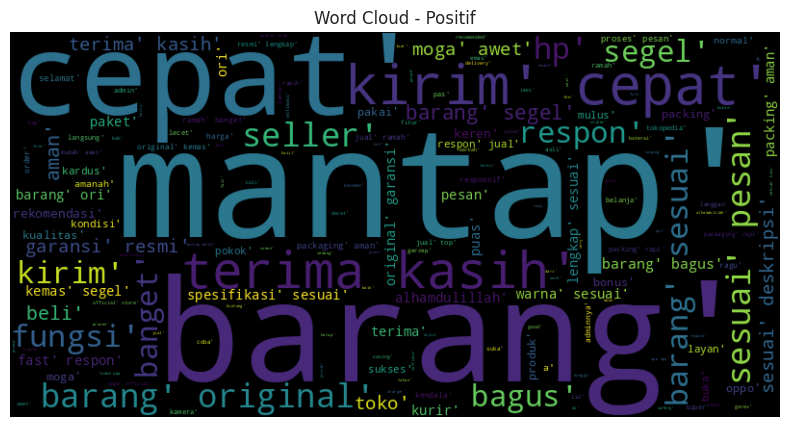

In [ ]:
# word cloud ulasan Positif
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positif_review = data[data['Sentiment'] == 'Positif']['Stemmer']
positif_text = " ".join(positif_review)

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(positif_text, "Word Cloud - Positif")



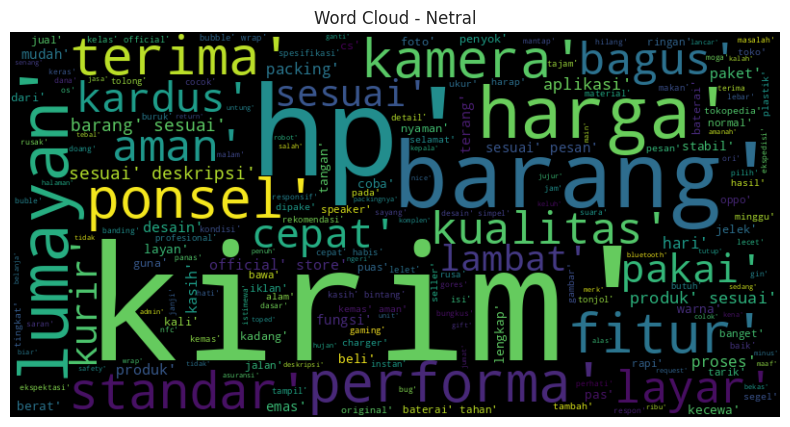

In [ ]:
# word cloud ulasan netral
import matplotlib.pyplot as plt
from wordcloud import WordCloud

neutral_reviews = data[data['Sentiment'] == 'Netral']['Stemmer']
neutral_text = " ".join(neutral_reviews)

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(neutral_text, "Word Cloud - Netral")



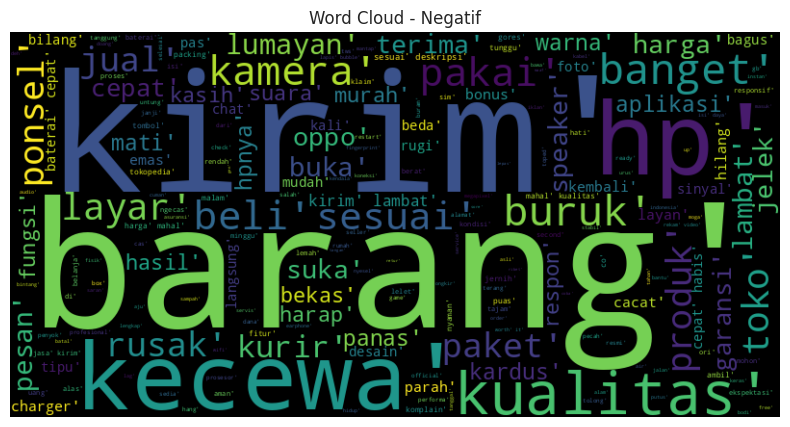

In [ ]:
# word cloud ulasan negatif
import matplotlib.pyplot as plt
from wordcloud import WordCloud

negatif_review = data[data['Sentiment'] == 'Negatif']['Stemmer']
negatif_text = " ".join(negatif_review)

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

create_wordcloud(negatif_text, "Word Cloud - Negatif")



# save model


In [ ]:
# Vektorisasi data teks menggunakan TF-IDF
vectorizer = TfidfVectorizer(stop_words=indonesian_stop_words, max_features=None)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# menyimpan model
from joblib import dump, load

# Simpan model KNN
dump(knn, 'knn_sentiment_model.joblib')

# Simpan vectorizer TF-IDF
dump(vectorizer, 'tfidf_vectorizer.joblib')

print("Model dan vectorizer berhasil disimpan!")
len(vectorizer.vocabulary_)


Model dan vectorizer berhasil disimpan!


1783

In [ ]:
# memuat model
# Load model KNN
knn_loaded = load('knn_sentiment_model.joblib')

# Load TF-IDF vectorizer
vectorizer_loaded = load('tfidf_vectorizer.joblib')

print("Model dan vectorizer berhasil dimuat kembali!")


Model dan vectorizer berhasil dimuat kembali!


In [ ]:
# Fungsi untuk menguji model dengan input manual
def test_manual_input():
    print("Masukkan teks ulasan (ketik 'stop' untuk berhenti):")
    while True:
        # Input teks ulasan dari pengguna
        ulasan = input("Ulasan: ")

        # Keluar jika input adalah 'stop'
        if ulasan.lower() == 'stop':
            print("Prediksi Berhenti")
            break

        # Preprocessing: Ubah menjadi huruf kecil
        ulasan = ulasan.lower()

        # Transformasi ulasan ke bentuk TF-IDF
        review_tfidf = vectorizer_loaded.transform([ulasan])

        # Prediksi sentimen
        prediction = knn.predict(review_tfidf)[0]

        # Tampilkan hasil prediksi
        print(f"Sentimen: {prediction}\n")

# Jalankan fungsi
test_manual_input()


Masukkan teks ulasan (ketik 'stop' untuk berhenti):
Ulasan: toped kurir rekom nya jangan jne,lamaaaaaaaaaa
Sentimen: Positif

Ulasan: stop
Prediksi Berhenti


In [ ]:
print(f"Jumlah fitur saat pelatihan: {len(vectorizer.vocabulary_)}")

Jumlah fitur saat pelatihan: 1783
